In [11]:
import sys
sys.path.append('../../helper')

In [12]:
from temporal_networks import *

Loading ../../counting/wos-soc-limitedtitles-cooc from disk...
Loading ../../counting/wos-econ-limitedtitles-cooc from disk...
1000 1000 terms from soc, econ


In [32]:
import temporal_networks
from importlib import reload
reload(temporal_networks)
get_tnets = temporal_networks.get_tnets

Loading ../../counting/wos-soc-limitedtitles-cooc from disk...
Loading ../../counting/wos-econ-limitedtitles-cooc from disk...
663 663 terms from soc, econ


In [181]:
YMIN=1960
YMAX=2015
YSTEP=5
YWINDOW=10

YS = range(YMIN, YMAX, YSTEP)

In [44]:
cc_soc = temporal_networks.cc_soc
cc_econ = temporal_networks.cc_econ

In [ ]:
# first let's get two egonets we understand

In [97]:
tn1 = get_tnets(cc_soc, 'behavior', pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
tn2 = get_tnets(cc_econ, 'behavior', pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)

max accepted p-value: 0.0007084151117241016


/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/3471542626.py:30: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0006480368819812369


In [226]:
tn1 = get_tnets(cc_soc, 'behavior', topN=20, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
tn2 = get_tnets(cc_econ, 'behavior', topN=20, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)

max accepted p-value: 0.006770463219963547


/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/2679125410.py:39: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0001012172929524744


In [227]:
tn1.shape, tn2.shape

((11, 663), (11, 663))

In [228]:
len( set(cc_soc.terms) - set(cc_econ.terms) ), len( set(cc_econ.terms) - set(cc_soc.terms) )

(0, 0)

# resize / reorganize tnets to match each other

In [229]:
intersect_term_set = sorted( set( cc_soc.terms ) & set( cc_econ.terms ) )

In [230]:
cc_soc_index = [cc_soc.terms.index(t) for t in intersect_term_set if t in cc_soc.terms]
cc_econ_index = [cc_econ.terms.index(t) for t in intersect_term_set if t in cc_econ.terms]

In [231]:
len(cc_soc.terms)

663

In [232]:
tn1 = tn1[:, cc_soc_index]
tn2 = tn2[:, cc_econ_index]

In [233]:
tn1.shape, tn2.shape

((11, 663), (11, 663))

# jaccard

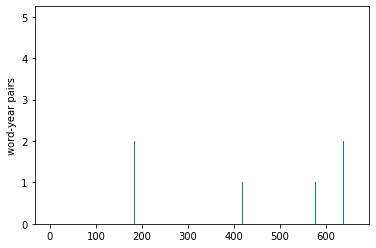

In [234]:
plt.bar( range(tn1.shape[1]), np.sum( (tn1>0) * (tn2>0), axis=0 ) );
plt.ylabel('word-year pairs');
# words where soc & econ both have significant association w behavior // 

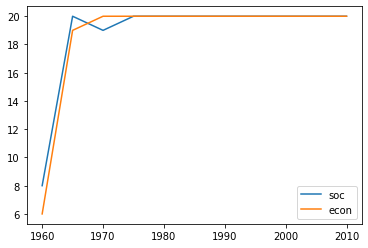

In [235]:
# total terms in the network, over time
plt.plot( YS, np.sum( tn1>0, axis=1 ), label='soc' )
plt.plot( YS, np.sum( tn2>0, axis=1 ), label='econ' )
plt.legend();

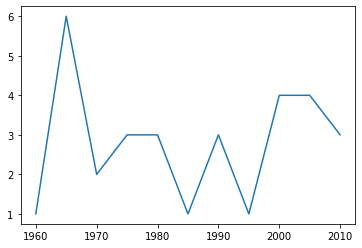

In [236]:
plt.plot(
    YS,
    np.sum( (tn1>0) * (tn2>0), axis=1 ) 
);

# jaccard similarity between the disciplines, over time
# at a maximum of 3 words!

In [237]:
tn1[1:,].shape

(10, 663)

In [238]:
tn1[:-1,].shape

(10, 663)

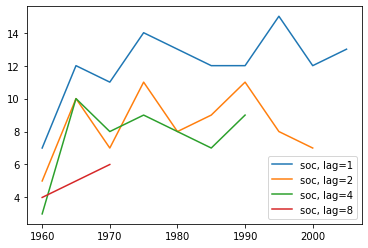

In [239]:
for lag in [1, 2, 4, 8]:
    plt.plot(
        list(YS)[:-lag],
        np.sum( (tn1[lag:,]>0) * (tn1[:-lag,]>0), axis=1 ),
        label='soc, lag='+str(lag)
    );
plt.legend()

# jaccard similarity between the disciplines and their own time-shifted selves
# at a maximum of 3 words!

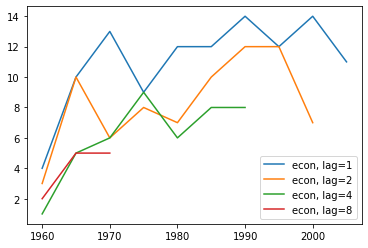

In [240]:
for lag in [1, 2, 4, 8]:
    plt.plot(
        list(YS)[:-lag],
        np.sum( (tn2[lag:,]>0) * (tn2[:-lag,]>0), axis=1 ),
        label='econ, lag='+str(lag)
    );
plt.legend()

# jaccard similarity between the disciplines and their own time-shifted selves
# at a maximum of 3 words!

In [241]:
# what are the intersections, and when did they happen?

In [242]:
from collections import defaultdict

In [243]:
WY = defaultdict(list)

for yi, ti in np.argwhere( (tn1>0) * (tn2>0) ):
    #print( f'({yi},{ti})', 1950+5*yi, 'behavior+'+intersect_term_set[ti] )
    WY[yi].append(intersect_term_set[ti])

for yi, ts in WY.items():
    print( 1950+5*yi )
    for t in ts:
        print("\t"+t)

1950
	theory
1955
	economic
	model
	political
	social
	structure
	theory
1960
	model
	organizational
1965
	effect
	model
	theory
1970
	effect
	group
	model
1975
	model
1980
	influence
	risk
	social
1985
	risk
1990
	economic
	effects
	evidence
	influence
1995
	effects
	evidence
	social
	voting
2000
	affect
	social
	voting


In [244]:
WY = defaultdict(list)

for yi, ti in np.argwhere( (tn1>0) + (tn2>0) ):
    #print( f'({yi},{ti})', 1950+5*yi, 'behavior+'+intersect_term_set[ti] )
    WY[yi].append((intersect_term_set[ti], 'soc'*((tn1>0)[yi,ti]) + 'econ'*((tn2>0)[yi,ti])))

for yi, ts in WY.items():
    print( 1950+5*yi )
    for t in ts:
        print("\t",t)

1950
	 ('attitudes', 'soc')
	 ('business', 'econ')
	 ('consumer', 'econ')
	 ('differences', 'soc')
	 ('economic', 'econ')
	 ('effects', 'soc')
	 ('factors', 'soc')
	 ('investment', 'econ')
	 ('management', 'econ')
	 ('political', 'soc')
	 ('role', 'soc')
	 ('structure', 'soc')
	 ('theory', 'socecon')
1955
	 ('american', 'econ')
	 ('approach', 'soc')
	 ('attitudes', 'soc')
	 ('change', 'soc')
	 ('children', 'soc')
	 ('college', 'soc')
	 ('comment', 'econ')
	 ('consumer', 'econ')
	 ('corporate', 'econ')
	 ('cost', 'econ')
	 ('decision', 'soc')
	 ('economic', 'socecon')
	 ('effects', 'soc')
	 ('empirical', 'econ')
	 ('factors', 'soc')
	 ('firm', 'econ')
	 ('health', 'soc')
	 ('income', 'econ')
	 ('interest', 'econ')
	 ('investment', 'econ')
	 ('market', 'econ')
	 ('model', 'socecon')
	 ('organizational', 'soc')
	 ('patterns', 'soc')
	 ('political', 'socecon')
	 ('price', 'econ')
	 ('process', 'soc')
	 ('rates', 'econ')
	 ('role', 'soc')
	 ('social', 'socecon')
	 ('structure', 'socecon')
	

/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/2627284709.py:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  WY[yi].append((intersect_term_set[ti], 'soc'*((tn1>0)[yi,ti]) + 'econ'*((tn2>0)[yi,ti])))


# I'm interested in how many words have substantial egonets

In [ ]:
for t in sorted(cc_soc.terms, key=lambda x:-cc_soc(t=x)):
    print(t)
    try:
        tn1 = get_tnets(cc_soc, t, pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
    except ValueError:
        print('soc network zero')
    try:
        tn2 = get_tnets(cc_econ, t, pcut=0.01, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
    except ValueError:
        print('soc network zero')
    
    print(f'socn', np.sum(tn1>0, axis=1), 'econn', np.sum(tn2>0, axis=1))
    print("")

review
max accepted p-value: 3.7547963591424674e-05


/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/2679125410.py:39: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0
socn [0 1 1 1 0 1 1 1 1 1 1] econn [0 0 0 0 0 0 0 0 0 0 0]

article


/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/2679125410.py:38: RuntimeWarning: divide by zero encountered in true_divide
  mat = mat / mat[~np.isnan(mat)].max()
/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/2679125410.py:38: RuntimeWarning: invalid value encountered in true_divide
  mat = mat / mat[~np.isnan(mat)].max()


soc network zero
max accepted p-value: 0.0
socn [0 1 1 1 0 1 1 1 1 1 1] econn [0 0 0 0 0 0 0 0 0 0 0]

social
max accepted p-value: 5.190323518805526e-19


/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_1967/2679125410.py:39: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 6.552959340584152e-29
socn [14 14 14 13 14 15 14 14 14 13 15] econn [14 14 13 13 12 12 13 13 10 11 13]

family
max accepted p-value: 8.225649092299342e-12
max accepted p-value: 9.152981759356037e-08
socn [13 14 14 14 14 14 14 14 13 14 15] econn [14 15 15 15 15 15 15 15 15 14 14]

women
max accepted p-value: 9.639364232568453e-07
max accepted p-value: 4.805332381235054e-07
socn [ 8 14 15 15 14 15 15 15 14 14 15] econn [ 6 13 15 15 13 13 14 13 14 15 15]

class
max accepted p-value: 0.0006534004953334388
max accepted p-value: 0.00045326008588589554
socn [13 14 15 15 15 15 15 15  2  5 15] econn [ 7  8 14 15 15 15 15 15 15 15 15]

work
max accepted p-value: 0.0006853571440972665
max accepted p-value: 2.053647297112857e-05
socn [ 6 14 15 15 15 15 15 15 14 14 15] econn [11 14 13 14 14 15 15 14 11 11 14]

education
max accepted p-value: 9.897268797894962e-05
max accepted p-value: 1.910335708681539e-13
socn [14 15 15 15 15 15 14 15 14 15 15] econn [14 14 14 15 15 14 15 14 